In [1]:
# Import necessary modules.

import tensorflow
import keras
import helpers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


### Dataset has 10 label names.  
'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [2]:
label_names = helpers.label_names
num_labels = len(label_names)

# Data Scraping

train_labels -> train_data  
test_labels -> test_data

In [3]:
print('Training data are loading...')
train_data = pd.read_csv('fashion-mnist_train.csv', nrows=60000)
print('Training data loaded!')
print('Test data are loading...')
test_data = pd.read_csv('fashion-mnist_test.csv', nrows=10000)
print('Test data loaded!')

Training data are loading...
Training data loaded!
Test data are loading...
Test data loaded!


# Data Slicing

In [4]:
train_labels = train_data.iloc[:, 0]  # All rows, include only first "label" column.
test_labels = test_data.iloc[:, 0]
train_data = train_data.iloc[:, 1:]  # All rows, exclude only first "label" column.
test_data = test_data.iloc[:, 1:]
train_data = np.array(train_data)  # Convert data frame to numpy array.
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

### Slice 0.1 of training dataset to create validation dataset.

In [6]:
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.1, random_state=randint(0, 100))

# Data Preprocessing
### Reshape all data from 1x784 -> 28x28x1 to get valid images.

In [7]:
train_data = np.array(list(map(lambda x: x.reshape(28, 28, 1), train_data)))
val_data = np.array(list(map(lambda x: x.reshape(28, 28, 1), val_data)))
test_data = np.array(list(map(lambda x: x.reshape(28, 28, 1), test_data)))

# Data Preprocessing
### Reshape data from 28x28x1 to 28x28 to plot them successfully.

In [8]:
plot_test_data = np.array(list(map(lambda x: x.reshape(28, 28), test_data)))

### Get sample image.

In [9]:
sample_img = plot_test_data[0]
sample_img_label = label_names[test_labels[0]]

### Display sample image in colorbar.

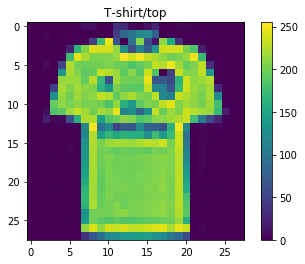

In [10]:
plt.figure()
plt.imshow(sample_img)
plt.colorbar()
plt.grid(False)
plt.title(sample_img_label)
plt.show()

### Display data shapes to verify before building model.

In [11]:
print('Training data shape:', train_data.shape)
print('Validation data shape:', val_data.shape)
print('Test data shape:', test_data.shape)
print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

Training data shape: (54000, 28, 28, 1)
Validation data shape: (6000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Training labels shape: (54000,)
Validation labels shape: (6000,)
Test labels shape: (10000,)


# Data Preprocessing (Normalization)
### We want values between 0-1, not 0-255.

In [12]:
train_data = train_data / 255.0
val_data = val_data / 255.0
test_data = test_data / 255.0

### Display sample images with their labels to verify preprocessing phase.
*cmap='gray makes images black and white.*

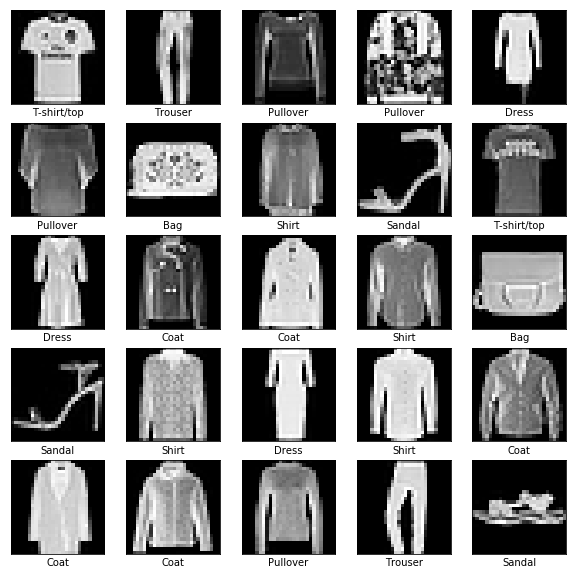

In [13]:
helpers.display_sample_multi(plot_test_data, test_labels)

# Label Encoding
### One hot encoding for categorical classification (categorical_crossentropy).

In [14]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=num_labels)
val_labels = keras.utils.to_categorical(val_labels, num_classes=num_labels)
test_labels = keras.utils.to_categorical(test_labels, num_classes=num_labels)

### CNNs are best for image processing, so we need to build a CNN model for best results.

In [15]:
keras.model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal', # he_normal using in ImageNet challenge.
                 input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_labels, activation='softmax')
])

In [16]:
keras.model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fit_history = keras.model.fit(
    train_data, train_labels, epochs=25,
    batch_size=256, validation_data=(val_data, val_labels))

test_loss, test_acc = keras.model.evaluate(test_data, test_labels)
predictions = keras.model.predict(test_data)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 75s 1ms/step - loss: 0.8138 - acc: 0.6943 - val_loss: 0.5026 - val_acc: 0.8157
Epoch 2/25
54000/54000 [==============================] - 89s 2ms/step - loss: 0.4949 - acc: 0.8148 - val_loss: 0.4220 - val_acc: 0.8482
Epoch 3/25
54000/54000 [==============================] - 77s 1ms/step - loss: 0.4235 - acc: 0.8443 - val_loss: 0.3739 - val_acc: 0.8643
Epoch 4/25
54000/54000 [==============================] - 91s 2ms/step - loss: 0.3806 - acc: 0.8601 - val_loss: 0.3303 - val_acc: 0.8795
Epoch 5/25
54000/54000 [==============================] - 105s 2ms/step - loss: 0.3536 - acc: 0.8710 - val_loss: 0.3042 - val_acc: 0.8900
Epoch 6/25
54000/54000 [==============================] - 89s 2ms/step - loss: 0.3302 - acc: 0.8793 - val_loss: 0.3010 - val_acc: 0.8880
Epoch 7/25
54000/54000 [==============================] - 77s 1ms/step - loss: 0.3153 - acc: 0.8842 - val_loss: 0.2823 - val_acc

### Display performance of model comparing validations.

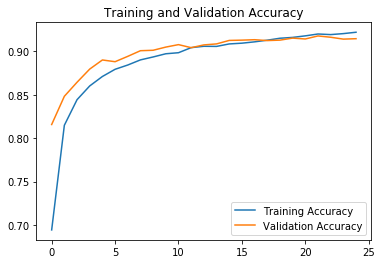

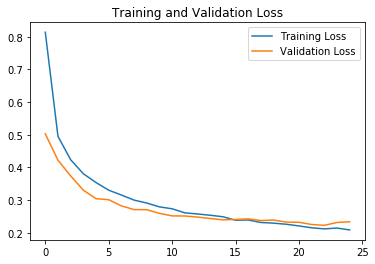

In [17]:
helpers.display_model_performance(fit_history)

In [18]:
print('Sample one prediction array:', predictions[1])  # Prediction results vary between 0 and 1 for every class.
print('Strongest prediction:', np.argmax(predictions[1]), '-', label_names[np.argmax(predictions[1])])  # Get the biggest prediction result's class (index of prediction array).
print('Test strongest prediction:', test_labels[1], '-', label_names[np.argmax(test_labels[1])])  # Verify by checking real test label.

Sample one prediction array: [2.6656122e-09 1.0000000e+00 1.3517859e-10 1.9468708e-08 2.0777692e-11
 9.0846302e-17 4.6064741e-10 3.4823086e-16 5.3609426e-12 4.3776854e-16]
Strongest prediction: 1 - Trouser
Test strongest prediction: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] - Trouser


### Display multiple image predictions and results.

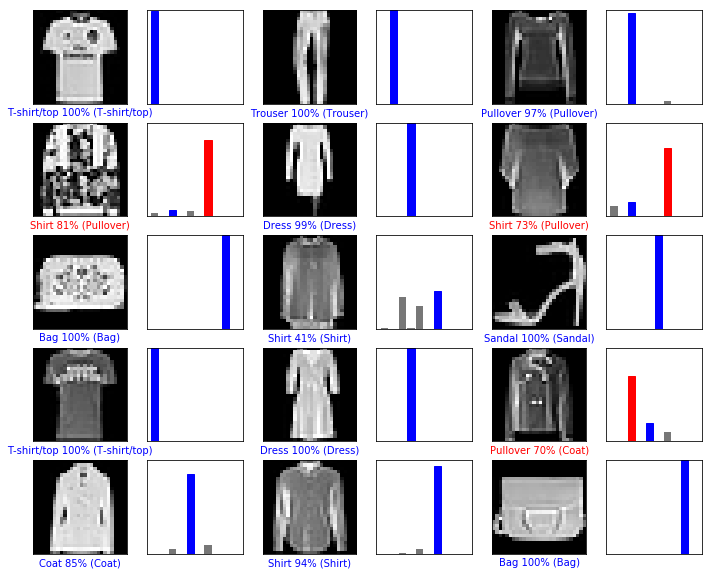

In [19]:
helpers.display_multi(predictions, test_labels, plot_test_data)

### Display single image prediction and result.

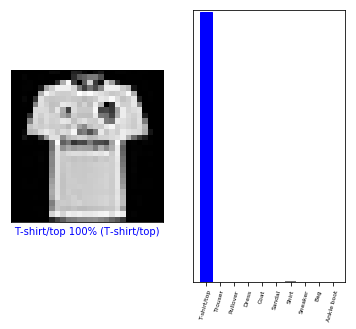

In [21]:
helpers.display_single(predictions, test_labels, plot_test_data)